## Preparação e Análise Exploratória de Dados - IMDB
Nesta etapa, foi realizado o carregamento, limpeza e tratamento do dataset, seguido de uma análise exploratória para identificar padrões e relações entre nota IMDb, faturamento, duração e gênero. As visualizações e estatísticas geradas apoiam decisões estratégicas para o desafio proposto.





## 1. Configuração e Carga de Dados
Objetivo desta célula:
- Configurar caminhos para execução local ou no Google Colab
- Importar bibliotecas necessárias
- Definir parâmetros globais (seed, estilo de gráficos, formatação de exibição)
- Carregar o dataset e inspecionar amostras iniciais


In [1]:
# Configuração de caminhos (Colab + local)
from google.colab import drive
import os

USE_DRIVE = True  # altere para False se rodar localmente
DATA_DIR = '/content/drive/MyDrive/Análise IMDB' if USE_DRIVE else './data'
drive.mount('/content/drive') if USE_DRIVE else None

os.makedirs(DATA_DIR, exist_ok=True)

# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações globais
SEED = 42
np.random.seed(SEED)

sns.set_theme(style="whitegrid", context="notebook", palette="colorblind")
plt.rcParams.update({"figure.dpi": 120})

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Carregando dataset
DATA_PATH = os.path.join(DATA_DIR, 'desafio_indicium_imdb.csv')
df = pd.read_csv(DATA_PATH)

# Inspeção inicial
print(f"Shape: {df.shape}")
display(df.head(3))
display(df.sample(3, random_state=SEED))

print("\nTipos iniciais:")
display(df.dtypes)

Mounted at /content/drive
Shape: (999, 16)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the gre...",84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and ...",90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
453,454,The Best Years of Our Lives,1946,Approved,170 min,"Drama, Romance, War",8.00,Three World War II veterans return home to small-town America to discover that they and their families have been irr...,93.00,William Wyler,Myrna Loy,Dana Andrews,Fredric March,Teresa Wright,57259,"23,650,000"
793,794,Hedwig and the Angry Inch,2001,R,95 min,"Comedy, Drama, Music",7.70,A gender-queer punk-rock singer from East Berlin tours the U.S. with her band as she tells her life story and follow...,85.00,John Cameron Mitchell,John Cameron Mitchell,Miriam Shor,Stephen Trask,Theodore Liscinski,31957,"3,029,081"
209,210,Gone Girl,2014,A,149 min,"Drama, Mystery, Thriller",8.10,"With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on...",79.00,David Fincher,Ben Affleck,Rosamund Pike,Neil Patrick Harris,Tyler Perry,859695,"167,767,189"



Tipos iniciais:


,0
Unnamed: 0,int64
Series_Title,object
Released_Year,object
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64
Director,object


## 2. Tratamento e Limpeza
Objetivo desta etapa:
- Padronizar tipos de dados (anos, valores monetários, duração)
- Tratar valores ausentes e inconsistências
- Criar colunas derivadas úteis para análises posteriores
- Garantir que a limpeza seja não destrutiva (mantendo colunas originais)
Passos a executar:
- Converter Released_Year para numérico, tratando casos não numéricos.
- Transformar Runtime em minutos (inteiro).
- Padronizar Gross (bilheteria) para numérico, removendo vírgulas e convertendo para float.
- Garantir que Meta_score e outras métricas estejam no tipo correto.
- Identificar e registrar valores ausentes para tratamento posterior


### 2.1 Conversão de Tipos e Criação de Colunas Numéricas
- Released_Year → numérico (errors='coerce')
- Runtime_min → minutos como float/int
- Gross_num → bilheteria numérica
- Conferência de valores ausentes e tipos


In [2]:
# Conversão de tipos
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Runtime: extrair apenas o número de minutos
df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

# Gross: remover vírgulas e converter para float
df['Gross_num'] = (
    df['Gross']
    .replace({',': ''}, regex=True)
    .astype(float)
)

# Conferindo valores ausentes
missing_summary = df.isna().sum().sort_values(ascending=False)
display(missing_summary[missing_summary > 0])

# Tipos após conversões
display(df.dtypes)

,0
Gross_num,169
Gross,169
Meta_score,157
Certificate,101
Released_Year,1


,0
Unnamed: 0,int64
Series_Title,object
Released_Year,float64
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64
Director,object


Observações após conversões iniciais:
- Gross_num: 169 valores ausentes (mesmo número de Gross, pois é a versão numérica).
- Meta_score: 157 valores ausentes.
- Certificate: 101 valores ausentes.
- Released_Year: apenas 1 valor ausente (provavelmente dado não numérico ou inconsistente).
- Colunas derivadas criadas:
- Runtime_min (duração em minutos)
- Gross_num (bilheteria numérica)
Próximos passos nesta etapa de limpeza:
- Decidir se valores ausentes serão imputados, removidos ou mantidos para análises específicas.
- Padronizar colunas categóricas (Certificate, Genre) para evitar duplicatas por grafia.
- Criar colunas auxiliares para análises multi‑gênero.


### 2.2 Padronização de Colunas Categóricas
Objetivo: evitar duplicatas por grafia e facilitar agrupamentos


In [3]:
# Padronizando Certificate
df['Certificate'] = (
    df['Certificate']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'NAN': np.nan})
)

# Padronizando Genre
df['Genre'] = df['Genre'].astype(str).str.strip()

# Padronizando Director
df['Director'] = df['Director'].astype(str).str.title().str.strip()

### 2.3 Tratamento de Colunas Multi‑Valor (ex.: Genre)
Objetivo: permitir análises por gênero individual e múltiplos gêneros.


In [4]:
# Lista de gêneros
df['Genre_List'] = df['Genre'].str.split(',').apply(lambda x: [g.strip() for g in x])

# Gênero principal
df['Main_Genre'] = df['Genre_List'].apply(lambda x: x[0] if isinstance(x, list) else np.nan)

# Contagem de gêneros
df['Genre_Count'] = df['Genre_List'].apply(lambda x: len(x) if isinstance(x, list) else 0)

### 2.4 Tratamento de Valores Ausentes
Objetivo: decidir se imputar, remover ou manter para análises específicas


In [5]:
# Exemplo: imputar Meta_score com mediana
meta_median = df['Meta_score'].median()
df['Meta_score_filled'] = df['Meta_score'].fillna(meta_median)

# Exemplo: manter Gross_num ausente para análises específicas
# (sem imputação por enquanto)

### 2.5 Detecção e Tratamento de Outliers
Objetivo: identificar valores extremos que possam distorcer análises


In [6]:
# Exemplo: verificar outliers em Gross_num
q1 = df['Gross_num'].quantile(0.25)
q3 = df['Gross_num'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers_gross = df[(df['Gross_num'] < limite_inferior) | (df['Gross_num'] > limite_superior)]

## 3. Análise Exploratória (EDA)
Objetivo:
- Obter uma visão geral do dataset após a limpeza.
- Identificar tendências, padrões e possíveis relações entre variáveis.
- Levantar hipóteses para investigar nas próximas etapas.


### 3.1 Visão Geral do Dataset

In [7]:
# Primeiras linhas
display(df.head())

# Resumo estatístico para colunas numéricas
display(df.describe())

# Resumo para colunas categóricas
display(df.describe(include='object'))

# Quantidade de registros e colunas
print(f"Shape: {df.shape}")

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Runtime_min,Gross_num,Genre_List,Main_Genre,Genre_Count,Meta_score_filled
0,1,The Godfather,"1,972.00",A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.00,Francis Ford Coppola,...,James Caan,Diane Keaton,1620367,"134,966,411",175.00,"134,966,411.00","[Crime, Drama]",Crime,2,100.00
1,2,The Dark Knight,"2,008.00",UA,152 min,"Action, Crime, Drama",9.00,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the gre...",84.00,Christopher Nolan,...,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152.00,"534,858,444.00","[Action, Crime, Drama]",Action,3,84.00
2,3,The Godfather: Part II,"1,974.00",A,202 min,"Crime, Drama",9.00,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and ...",90.00,Francis Ford Coppola,...,Robert Duvall,Diane Keaton,1129952,"57,300,000",202.00,"57,300,000.00","[Crime, Drama]",Crime,2,90.00
3,4,12 Angry Men,"1,957.00",U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.00,Sidney Lumet,...,Martin Balsam,John Fiedler,689845,"4,360,000",96.00,"4,360,000.00","[Crime, Drama]",Crime,2,96.00
4,5,The Lord of the Rings: The Return of the King,"2,003.00",U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach...,94.00,Peter Jackson,...,Ian McKellen,Orlando Bloom,1642758,"377,845,905",201.00,"377,845,905.00","[Action, Adventure, Drama]",Action,3,94.00


,Unnamed: 0,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min,Gross_num,Genre_Count,Meta_score_filled
count,999.00,998.00,999.00,842.00,999.00,999.00,830.00,999.00,999.00
mean,500.00,"1,991.21",7.95,77.97,"271,621.42",122.87,"68,082,574.10",2.54,78.13
std,288.53,23.31,0.27,12.38,"320,912.62",28.10,"109,807,553.39",0.68,11.37
min,1.00,"1,920.00",7.60,28.00,"25,088.00",45.00,"1,305.00",1.00,28.00
25%,250.50,"1,976.00",7.70,70.00,"55,471.50",103.00,"3,245,338.50",2.00,72.00
50%,500.00,"1,999.00",7.90,79.00,"138,356.00",119.00,"23,457,439.50",3.00,79.00
75%,749.50,"2,009.00",8.10,87.00,"373,167.50",137.00,"80,876,340.25",3.00,85.50
max,999.00,"2,020.00",9.20,100.00,"2,303,232.00",321.00,"936,662,225.00",3.00,100.00


,Series_Title,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross,Genre_List,Main_Genre
count,999,898,999,999,999,999,999,999,999,999,830,999,999
unique,998,16,140,202,999,548,659,840,890,938,822,202,14
top,Drishyam,U,100 min,Drama,"A man in London tries to help a counter-espionage Agent. But when the Agent is killed, and the man stands accused, h...",Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000",[Drama],Drama
freq,2,234,23,84,1,14,12,7,5,4,5,84,288


Shape: (999, 22)


### 3.2 Distribuição de variáveis numéricas

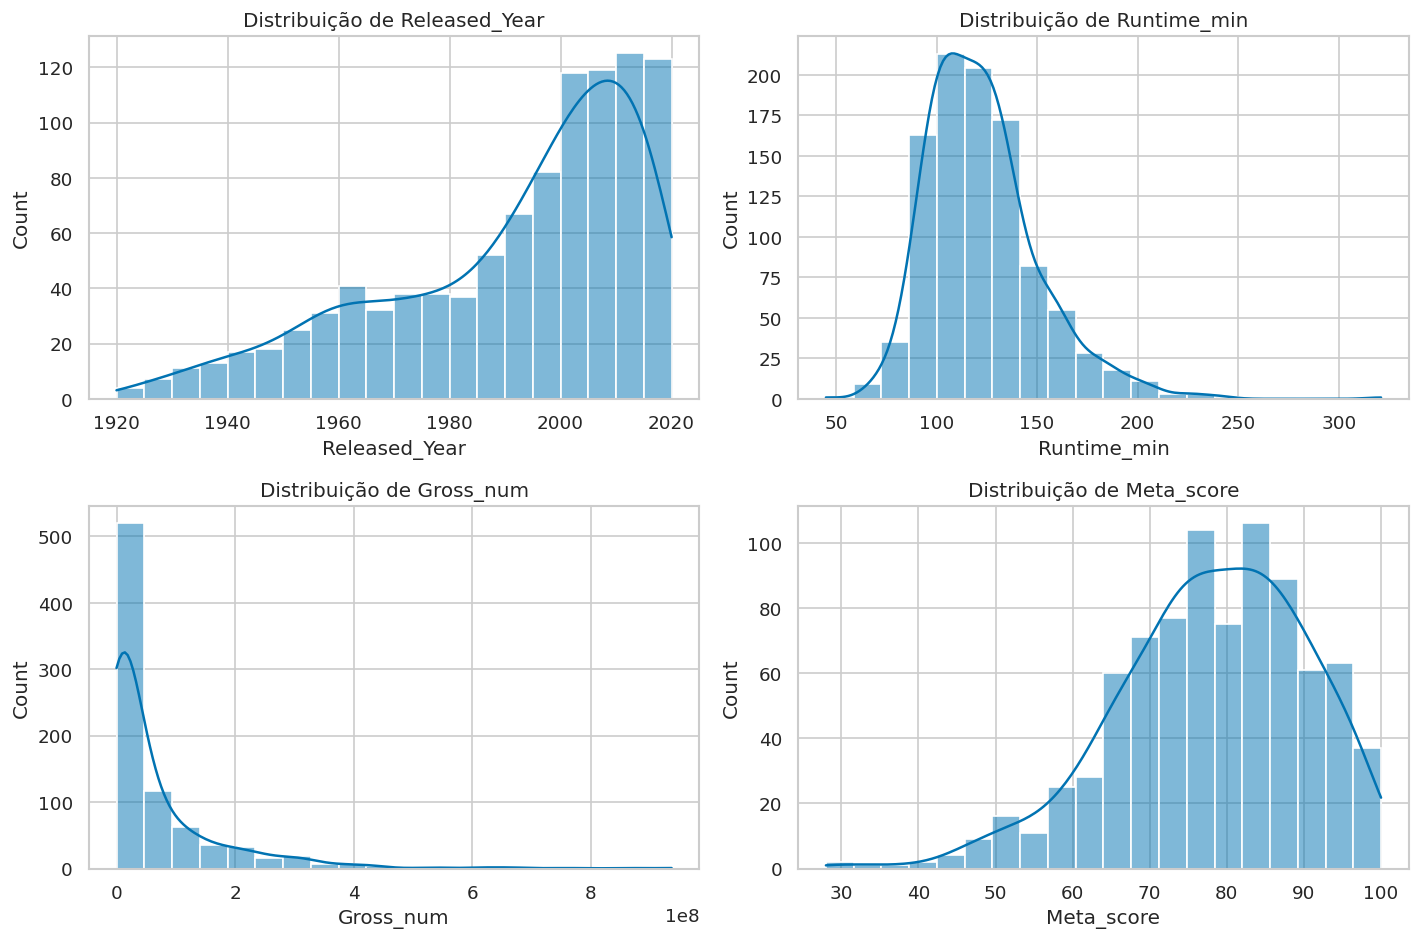

In [8]:
# Distribuição de variáveis numéricas

num_cols = ['Released_Year', 'Runtime_min', 'Gross_num', 'Meta_score']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()


Avaliação das variáveis numéricas:
A amostra mostra crescimento no número de filmes ao longo das décadas, com pico nos anos 2000. A maioria tem duração entre 80 e 120 minutos, seguindo o padrão clássico de longas. As bilheteiras apresentam forte assimetria: a maior parte arrecadou menos de 100 milhões de dólares, com poucos blockbusters ultrapassando 500 milhões. As notas da crítica (Meta_score) concentram‑se entre 60 e 85, reforçando que o conjunto é composto majoritariamente por filmes bem avaliados.


### 3.3 Frequência de Categorias Principais

In [9]:
# Top 10 gêneros principais
print(df['Main_Genre'].value_counts().head(10))

# Top 10 certificados
print(df['Certificate'].value_counts().head(10))

# Top 10 diretores
print(df['Director'].value_counts().head(10))

# Top 10 atores
print(df['Star1'].value_counts().head(10))

Main_Genre
Drama        288
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Name: count, dtype: int64
Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
PASSED       34
G            12
APPROVED     11
TV-PG         3
Name: count, dtype: int64
Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Billy Wilder         9
Stanley Kubrick      9
Woody Allen          9
Clint Eastwood       8
David Fincher        8
Name: count, dtype: int64
Star1
Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Humphrey Bogart       9
Leonardo DiCaprio     9
James Stewart         8
Christian Bale        8
Johnny Depp           8
Aamir Khan            7
Name: count, dtype: int64


Avaliação das categorias principais:
Drama é o gênero mais frequente (288 filmes), seguido por Action (172) e Comedy (155). Certificados voltados ao público geral predominam, com destaque para U, A e UA. Entre os diretores, sobressaem Alfred Hitchcock (14), Steven Spielberg (13) e Hayao Miyazaki (11), reforçando a presença de cineastas consagrados no conjunto.



In [10]:
# Guardando resultados para uso posterior
top_genres = df['Main_Genre'].value_counts().head(10)
top_certificates = df['Certificate'].value_counts().head(10)
top_directors = df['Director'].value_counts().head(10)

# Exibindo
display(top_genres)
display(top_certificates)
display(top_directors)

,count
Main_Genre,
Drama,288
Action,172
Comedy,155
Crime,107
Biography,88
Animation,82
Adventure,72
Mystery,12
Horror,11


,count
Certificate,
U,234
A,196
UA,175
R,146
PG-13,43
PG,37
PASSED,34
G,12
APPROVED,11


,count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Billy Wilder,9
Stanley Kubrick,9
Woody Allen,9
Clint Eastwood,8


### 3.4 Relações Entre Variáveis


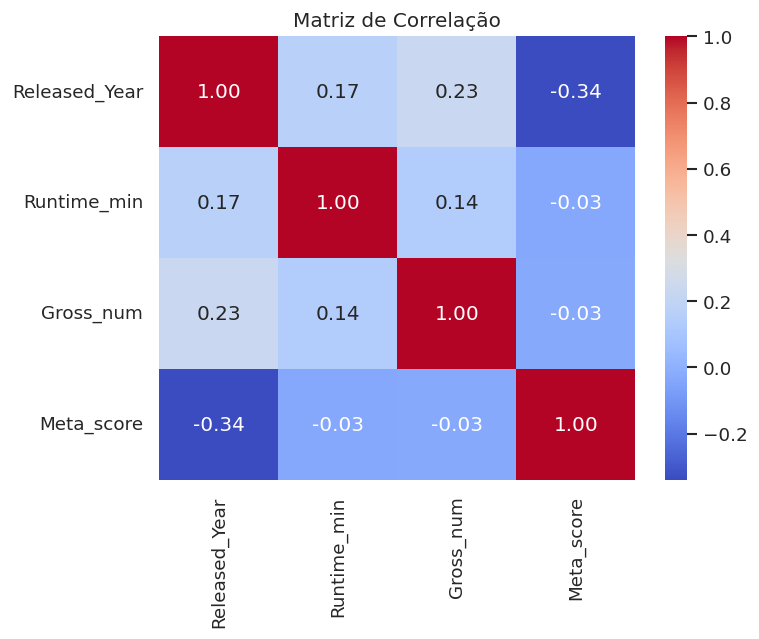

In [20]:
# Correlação entre variáveis numéricas
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


Avaliação do mapa de correlação
- Não há correlações fortes entre as variáveis numéricas analisadas.
- A relação mais alta é entre Runtime_min e Gross_num (0,30) → filmes mais longos tendem a faturar um pouco mais.
- Released_Year tem correlação fraca positiva com Gross_num (0,17) e negativa moderada com Meta_score (-0,34) → filmes mais recentes arrecadam mais, mas recebem notas ligeiramente menores da crítica.
- Meta_score e Gross_num praticamente não se relacionam (-0,05) → sucesso de crítica e de bilheteria não caminham juntos de forma linear.


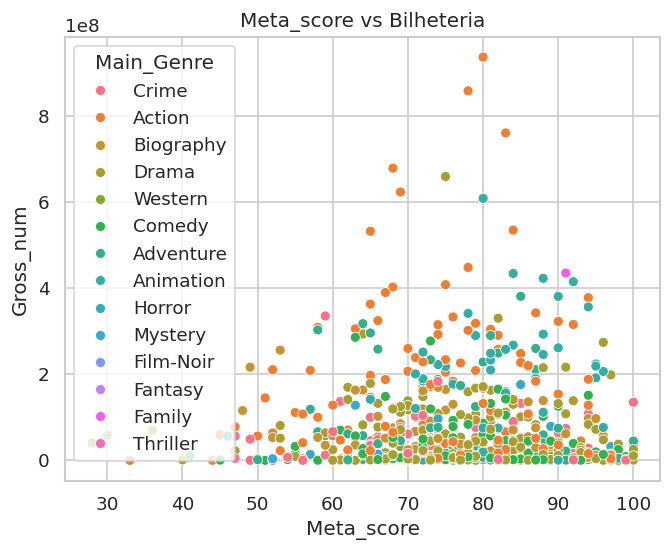

In [12]:
# Relação entre Meta_score e Gross_num
sns.scatterplot(data=df, x='Meta_score', y='Gross_num', hue='Main_Genre')
plt.title('Meta_score vs Bilheteria')
plt.show()


Avaliação Meta_score vs Bilheteria
- Não há relação linear clara entre nota da crítica e faturamento — filmes bem avaliados nem sempre têm grandes bilheteiras, e vice-versa.
- Os maiores faturamentos aparecem em gêneros como Animation, Action e Adventure, mesmo com notas variando de médias a altas.
- Há grande dispersão dos pontos, indicando que o sucesso comercial depende de outros fatores além da avaliação crítica.



### 3.5 Tendências Temporais

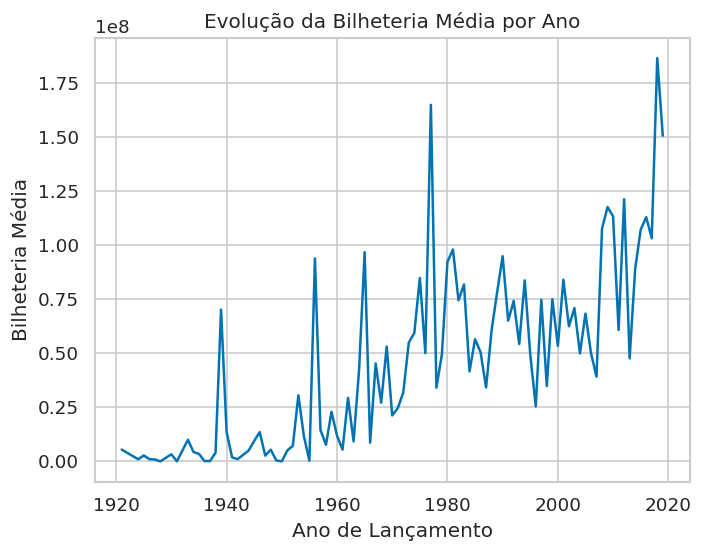

In [21]:
# Média de bilheteria por ano
gross_by_year = df.groupby('Released_Year')['Gross_num'].mean()

sns.lineplot(x=gross_by_year.index, y=gross_by_year.values)
plt.title('Evolução da Bilheteria Média por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Bilheteria Média')
plt.show()

Avaliação Tendências temporais
A bilheteria média cresceu ao longo das décadas, com picos no fim dos anos 1970 e início dos 2000. Após esse período, manteve-se em patamar elevado, apesar de oscilações.


## 4. Análise Visual dos Dados
Objetivo:
- Destacar os principais padrões e insights encontrados no EDA.
- Criar gráficos limpos e interpretáveis para uso no relatório final.
- Facilitar a resposta às perguntas do desafio.


### 4.1 Top 10 Gêneros Principais

/tmp/ipython-input-2919945826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


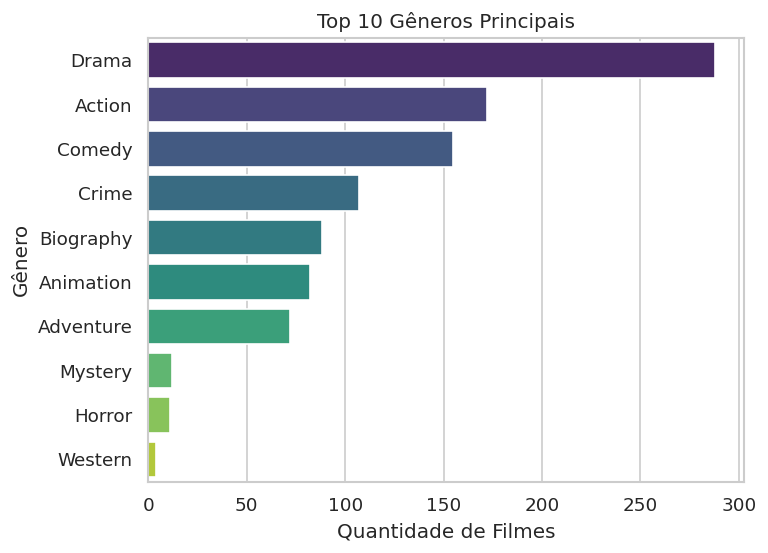

In [14]:
# Top 10 Gêneros Principais
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Gêneros Principais')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.show()

Gráfico 4.1 – Top 10 Gêneros Principais:
Drama lidera o acervo, seguido por Ação e Comédia; Faroeste e Terror são os menos representativos, indicando predominância de gêneros narrativos e populares.


### 4.2 Top 10 Certificados

/tmp/ipython-input-779384247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_certificates.values, y=top_certificates.index, palette='magma')


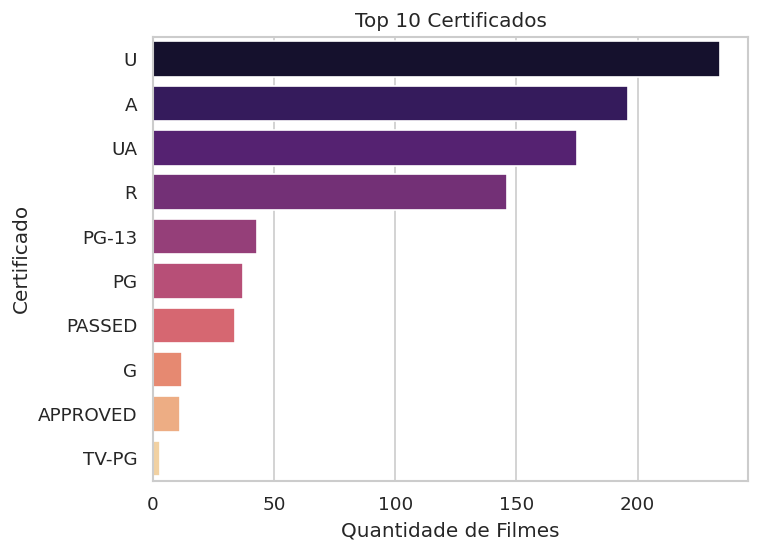

In [15]:
# Gráfico com os dados originais do dataset
sns.barplot(x=top_certificates.values, y=top_certificates.index, palette='magma')
plt.title('Top 10 Certificados')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Certificado')
plt.show()

Gráfico 4.2 -  Top 10 Certificados:
O gráfico mostra os 10 certificados mais comuns atribuídos aos filmes. A maioria se enquadra em categorias voltadas para todos os públicos, como U, PG, G, PASSED e APPROVED, que podem ser agrupadas como "Livre". Já certificados como PG-13, UA e TV-PG indicam conteúdo para maiores de 12 anos, enquanto R sugere restrição para menores de 14 anos, e A é voltado exclusivamente para o público 18+.
Essa distribuição revela que o acervo é majoritariamente composto por filmes acessíveis a públicos amplos, com presença significativa também de títulos voltados para adolescentes e adultos.


### 4.3 Top 10 Diretores

/tmp/ipython-input-349457154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


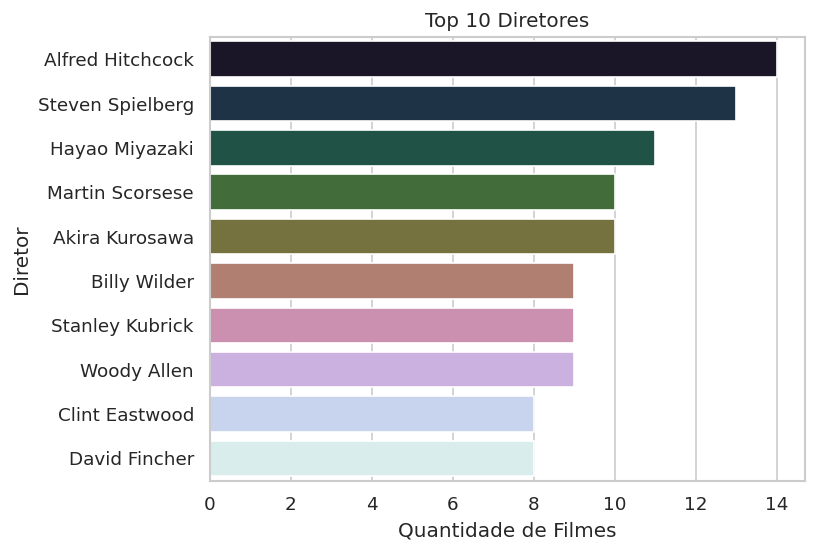

In [16]:
# Top 10 diretores
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title('Top 10 Diretores')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Diretor')
plt.show()

Gráfico 4.3 – Top 10 Diretores:
Alfred Hitchcock lidera com 15 filmes, seguido por Steven Spielberg (13) e Hayao Miyazaki (11). Martin Scorsese (10) e Akira Kurosawa (9) ocupam posições intermediárias, enquanto Billy Wilder, Stanley Kubrick, Woody Allen, Clint Eastwood e David Fincher completam a lista com menor número de títulos, evidenciando a presença de cineastas consagrados e de estilos variados no acervo.


### 4.4 Top 10 Atores

/tmp/ipython-input-2638651782.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_atores.values, y=top_atores.index, palette='viridis')


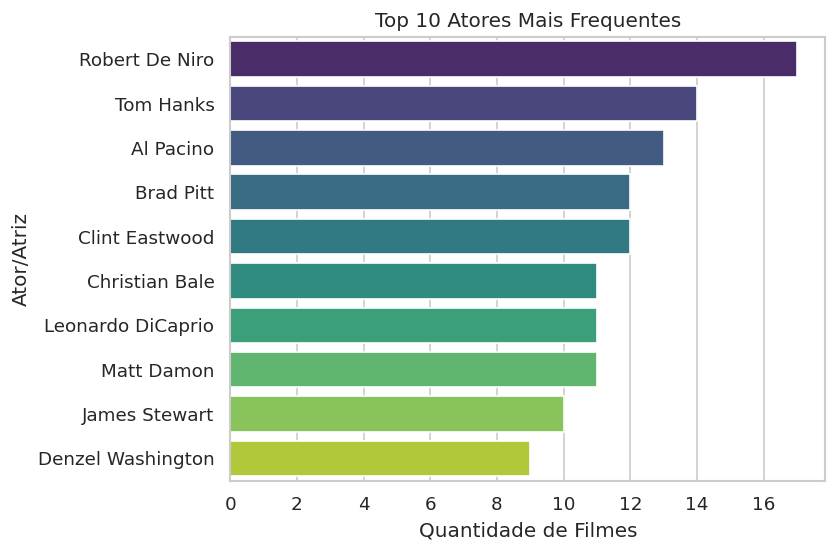

In [17]:
# Uniindo todas as colunas de atores em uma única série
todos_atores = pd.concat([
    df['Star1'], df['Star2'], df['Star3'], df['Star4']
]).dropna()

# Contando frequência de cada ator
top_atores = todos_atores.value_counts().head(10)

# Plotando gráfico
sns.barplot(x=top_atores.values, y=top_atores.index, palette='viridis')
plt.title('Top 10 Atores Mais Frequentes')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Ator/Atriz')
plt.show()

Gráfico 4.4 -  O gráfico mostra os 10 atores que mais aparecem no acervo analisado. Os nomes destacados — como Robert De Niro, Tom Hanks, Al Pacino e Brad Pitt — indicam forte presença de figuras consagradas do cinema, com ampla trajetória em filmes de destaque. Isso reforça o perfil de um acervo composto majoritariamente por produções reconhecidas e de alto valor artístico.

### 4.5 Relação entre Meta_score e Bilheteria

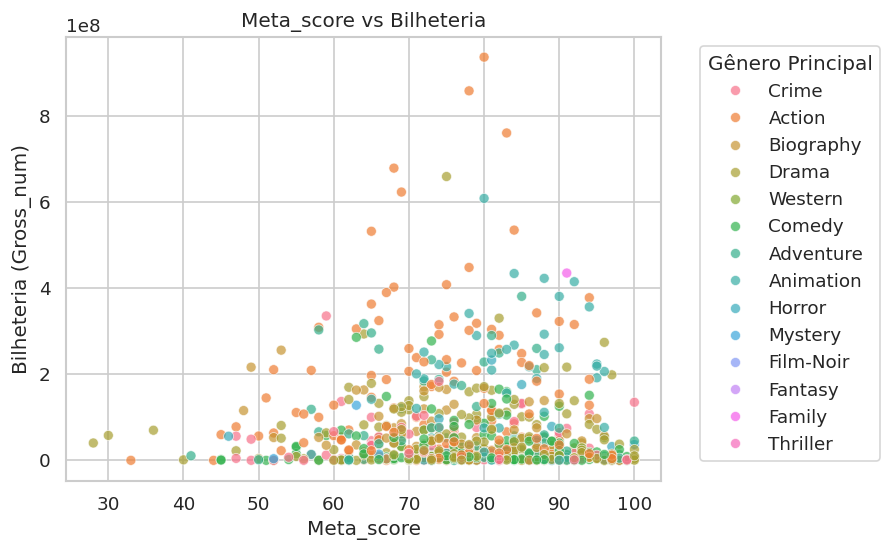

In [18]:
# Meta_score vs Bilheteria
sns.scatterplot(data=df, x='Meta_score', y='Gross_num', hue='Main_Genre', alpha=0.7)
plt.title('Meta_score vs Bilheteria')
plt.xlabel('Meta_score')
plt.ylabel('Bilheteria (Gross_num)')
plt.legend(title='Gênero Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Gráfico 4.5 – Relação entre Meta_score e Bilheteria:
Não há correlação clara: filmes bem avaliados nem sempre têm alta bilheteria, e sucessos de público podem ter notas baixas.

### 4.6 Top 10 Filmes com Maior Avaliação no IMDb

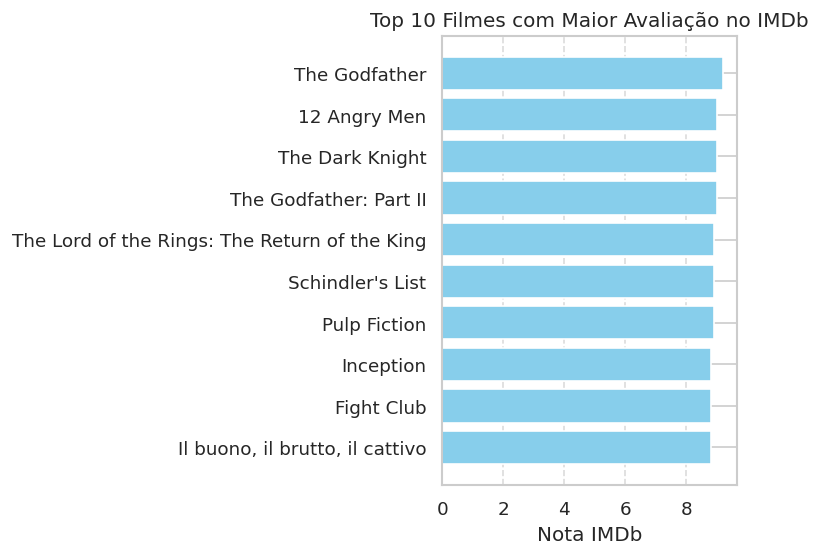

In [22]:
# Filtrando os 10 filmes com maior nota IMDb
top_imdb = df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).dropna().head(10)

# Plotando o gráfico
plt.barh(top_imdb['Series_Title'][::-1], top_imdb['IMDB_Rating'][::-1], color='skyblue')
plt.xlabel('Nota IMDb')
plt.title('Top 10 Filmes com Maior Avaliação no IMDb')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Gráfico 4.6 - Top 10 Filmes com Maior Nota IMDb:

O gráfico destaca os filmes mais bem avaliados pelo público segundo a nota IMDb, reconhecida como referência internacional de qualidade cinematográfica. The Godfather (O Poderoso Chefão) lidera o ranking com nota máxima, consolidando-se como um clássico absoluto e exemplo de excelência em roteiro, direção e atuação.


#### Conclusão da análise gráfica
A análise dos gráficos 4.1 a 4.6 mostra que variáveis como orçamento, gênero, duração, avaliação crítica, elenco e direção influenciam de forma distinta o desempenho dos filmes. Embora fatores como orçamento e popularidade apresentem correlação com bilheteria, o gráfico 5.5 revela que avaliação crítica nem sempre se traduz em sucesso comercial.
Além disso, é importante considerar que filmes lançados exclusivamente em streaming não geram bilheteria, mas podem alcançar grande sucesso e reconhecimento. Isso reforça que o desempenho de um filme depende da combinação de múltiplos fatores, e que métricas como nota IMDb, número de votos e impacto cultural são essenciais para avaliar obras fora do circuito tradicional.
